# **Email Spam Detection**

# **1. Introduction**

This Kaggle notebook presents a step-by-step guide to building an efficient Email spam classification model using the Email Spam Collection dataset. By the end of this notebook, you'll have a powerful tool to help you filter out unwanted emails.

# **2. Problem Statement**

The primary goal of this notebook is to develop a predictive model that accurately classifies incoming Email messages as either ham or spam. We will use the Email Spam Collection dataset, which consists of 193K EMail messages tagged with their respective labels.

# **3. Data Checks to Perofrm**

## **3.1 Import Necessary Libraries**

In [5]:
import numpy as np      
import pandas as pd       
import matplotlib.pyplot as plt 
%matplotlib inline


from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords


## **3.2 Load the Data**

In [6]:
df = pd.read_csv("../spam_Emails_data.csv")

In [7]:
df.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


# **4. Data Cleaning**

## 4.1 Data Info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193852 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193852 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


## 4.2 Drop the Rows have null values

In [11]:
df.isnull().sum()

label    0
text     2
dtype: int64

In [12]:
df = df.dropna(subset=['text'])

In [13]:
df.isnull().sum()

label    0
text     0
dtype: int64

## 4.3 Renaming the Columns

In [14]:
df.rename(columns = {'label': 'target'}, inplace = True)

In [16]:
df.columns

Index(['target', 'text'], dtype='object')

## 4.4 Encoding Target Variable

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [19]:
df.head()

,target,text
0,1,viiiiiiagraaaa\nonly for the ones that want to...
1,0,got ice thought look az original message ice o...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...
3,1,start increasing your odds of success & live s...
4,0,author jra date escapenumber escapenumber esca...


In [20]:
df.duplicated().sum()

np.int64(0)

## 4.4 Shape of Dataset

In [21]:
df.shape

(193850, 2)

# **5. Explratory Data Analysis (EDA)**

## 5.1 Percentage of Ham and Spam

In [22]:
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 52.70002579313903
percentage of 1 : 47.29997420686097


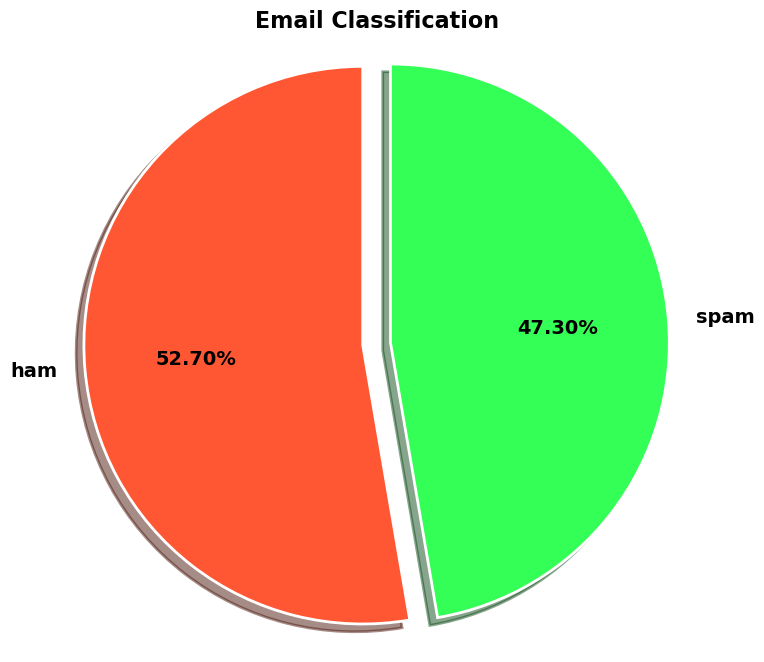

In [25]:
import matplotlib.pyplot as plt

colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

As seened from above image the dataset looks balance as Spam is 47.30% and ham is 52.70%

## 5.2 Text Length and Structure Analysis

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MoaviaHassan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
import nltk
print(nltk.data.path)
nltk.data.find('tokenizers/punkt')

['C:\\Users\\MoaviaHassan/nltk_data', 'c:\\Users\\MoaviaHassan\\miniconda3\\envs\\spam\\nltk_data', 'c:\\Users\\MoaviaHassan\\miniconda3\\envs\\spam\\share\\nltk_data', 'c:\\Users\\MoaviaHassan\\miniconda3\\envs\\spam\\lib\\nltk_data', 'C:\\Users\\MoaviaHassan\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


FileSystemPathPointer('C:\\Users\\MoaviaHassan\\AppData\\Roaming\\nltk_data\\tokenizers\\punkt')

In [39]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df['num_sentence'] = df['text'].apply(lambda x: len(x.split('.')))

In [40]:
df['num_characters'] = df['text'].apply(len)


In [42]:
df.describe()

,target,num_characters,num_words,num_sentence
count,193850.000000,1.938500e+05,1.938500e+05,193850.000000
mean,0.473000,1.812779e+03,2.760373e+02,3.335517
std,0.499272,2.659510e+04,3.671773e+03,19.266957
min,0.000000,1.000000e+00,1.000000e+00,1.000000
25%,0.000000,3.620000e+02,5.500000e+01,1.000000
50%,0.000000,8.000000e+02,1.270000e+02,1.000000
75%,1.000000,1.803000e+03,2.800000e+02,1.000000
max,1.000000,1.151031e+07,1.585483e+06,2732.000000


## 5.3 Summary Statistics for Legitimate Messages

In [43]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,1.021590e+05,1.021590e+05,102159.000000
mean,2.169723e+03,3.345735e+02,3.505702
std,3.656265e+04,5.047058e+03,24.562245
min,1.000000e+00,1.000000e+00,1.000000
25%,4.170000e+02,6.500000e+01,1.000000
50%,9.500000e+02,1.490000e+02,1.000000
75%,1.968000e+03,3.110000e+02,1.000000
max,1.151031e+07,1.585483e+06,2732.000000


## 5.4 Summary Statistics for Spam Messages

In [44]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,91691.000000,91691.000000,91691.000000
mean,1415.085112,210.818314,3.145903
std,2367.969268,337.864413,10.609727
min,1.000000,1.000000,1.000000
25%,309.000000,47.000000,1.000000
50%,675.000000,106.000000,1.000000
75%,1570.000000,239.000000,1.000000
max,144087.000000,25393.000000,945.000000


## 5.5 Character Length Distribution for Legitimate and Spam Messages

c:\Users\MoaviaHassan\miniconda3\envs\spam\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


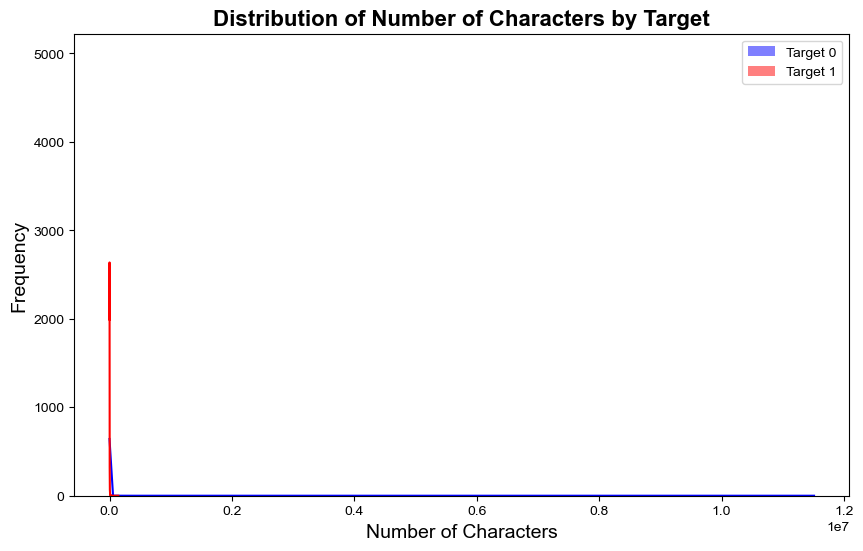

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

plt.legend()

sns.set(style='whitegrid')

plt.show()

## 5.6  Pairplot for Data Visualization

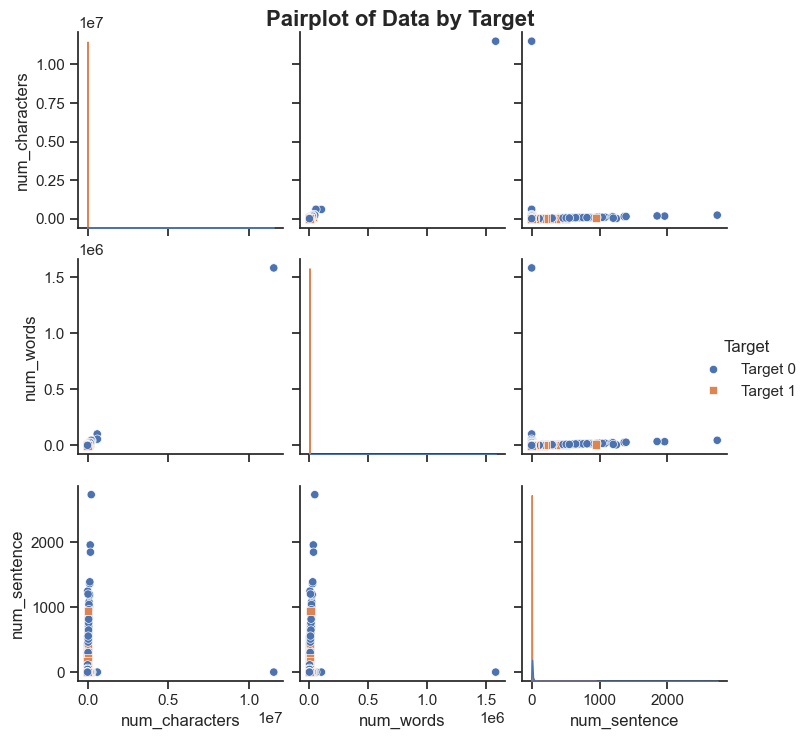

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()

## 5.7 Coorelation

In [48]:
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,-0.014167,-0.016828,-0.009324
num_characters,-0.014167,1.000000,0.998815,0.053617
num_words,-0.016828,0.998815,1.000000,0.081433
num_sentence,-0.009324,0.053617,0.081433,1.000000


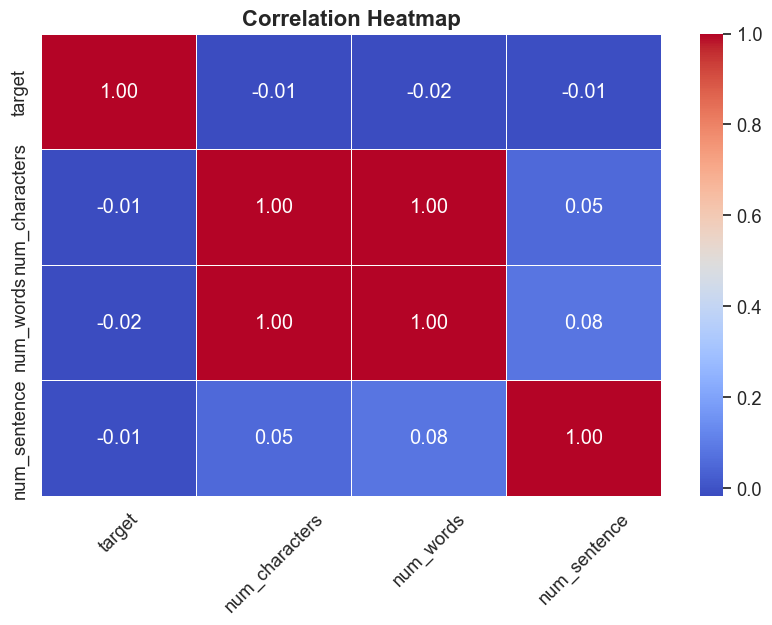

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()

#  **6 Data Preprocessing**

In [58]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [59]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

## 6.1 Creating a New Column: 'transformed_text'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.to_csv("../clean_dataset.csv")